c:\Users\jkbch\Projects\tue\VisualAnal\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


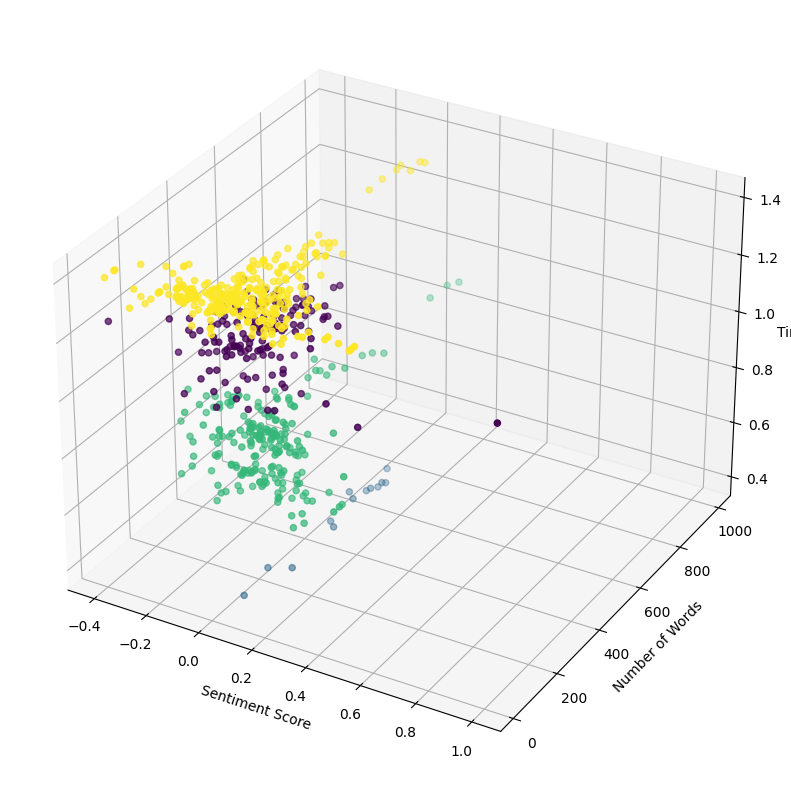

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

def visualize_sentiment_kmeans(file_name):
    # Read data from CSV file into pandas DataFrame
    data = pd.read_csv(file_name)
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    data.dropna(inplace=True)

    # Calculate sentiment scores using TextBlob
    sentiment_scores = []
    for content in data['content']:
        blob = TextBlob(content)
        sentiment_scores.append(blob.sentiment.polarity)
    data['sentiment_score'] = sentiment_scores

    # Extract number of words and time from each article
    num_words = []
    for content in data['content']:
        num_words.append(len(content.split()))
    data['num_words'] = num_words

    # Convert date column to datetime and extract timestamp as new column
    data['time'] = data['date'].apply(lambda x: x.timestamp())

    # Create feature matrix for clustering
    feature_matrix = data[['sentiment_score', 'num_words', 'time']].to_numpy()

    # Use k-means clustering to group articles by sentiment
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(feature_matrix)

    # Plot 3D scatter plot

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(feature_matrix[:, 0], feature_matrix[:, 1], feature_matrix[:, 2], c=kmeans.labels_)
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Number of Words')
    ax.set_zlabel('Time')
    plt.show()

    return data
data = visualize_sentiment_kmeans('results/input_cleaned.csv')


In [39]:
data.head()

,journal,title,date,content,sentiment_score,num_words,time
0,The Tulip,THE PLACE OF THE BEND TISKELE OF THE ROCKS GAS...,2000-08-16,ABILA Kronos - a explosion at surrounding the ...,-0.035658,204,9.663840e+08
1,Modern Rubicon,ON SCENE BLOG,2014-01-20,MODERNIZATION 1947 - from the news conference ...,0.193750,111,1.390176e+09
2,International News,Police Hold News Conference on GAStech Kidnapping,2014-01-21,ABILA Kronos - The Abila police held a press c...,-0.164286,77,1.390262e+09
3,Tethys News,To break off itself: The emergency to GAStech ...,2014-01-20,Modernization 1:40 PM: There are puttinges in...,-0.200000,42,1.390176e+09
4,Worldwise,Annual ends of gathering of POK in the riot still,2013-06-22,ABILA Kronos - the members of POK held their a...,0.053030,195,1.371859e+09


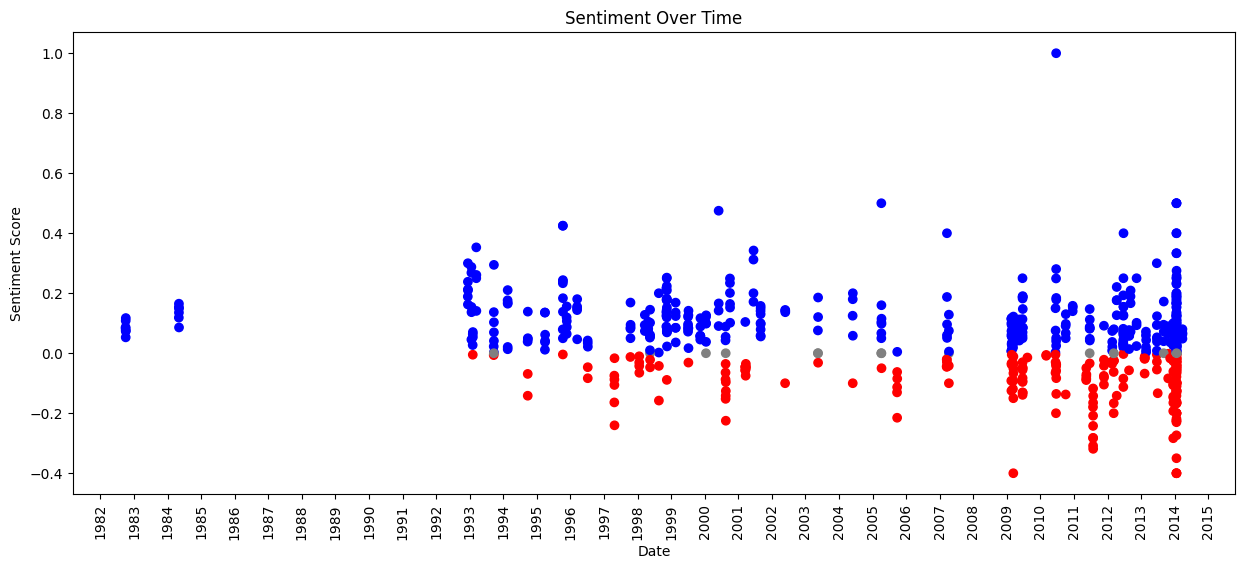

In [46]:
import matplotlib.dates as mdates

colors = []
for score in data['sentiment_score']:
    if score > 0:
        colors.append('blue')
    elif score < 0:
        colors.append('red')
    else:
        colors.append('gray')

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(data['date'], data['sentiment_score'], c=colors)
ax.set_title('Sentiment Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')

# Set x-axis ticks and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)

plt.show()


In [41]:
"""
TextBlob uses a pre-trained sentiment analysis model that assigns a polarity score to a piece of text. 
The polarity score ranges from -1 (negative) to +1 (positive), with 0 indicating a neutral sentiment. 
The library also provides methods for extracting other information from text, such as noun phrases 
and part-of-speech tags.
"""

'\nTextBlob uses a pre-trained sentiment analysis model that assigns a polarity score to a piece of text. \nThe polarity score ranges from -1 (negative) to +1 (positive), with 0 indicating a neutral sentiment. \nThe library also provides methods for extracting other information from text, such as noun phrases \nand part-of-speech tags.\n'